In [5]:
import pandas as pd
import requests
import zipfile
import io, os
import openpyxl
from pathlib import Path
import plotly.graph_objects as go
import plotly.io as pio
import matplotlib
import seaborn

## Podział pracy:
* zad 2 i 3: Maja Domańska
* zad 1 i 4: Joanna Huba

## wczytanie danych

In [6]:
DATA_DIR = Path("../data/processed")

df_ex2 = pd.read_csv(DATA_DIR / "df_ex2.csv")
df_ex4 = pd.read_csv(DATA_DIR / "df_ex4.csv")
monthly_PM25 = pd.read_csv(DATA_DIR / "monthly_PM25.csv")

# 2. Średnie miesięczne + trend dla miast

In [7]:
from pathlib import Path
import pandas as pd
import sys

from means import make_trend_df, trend_sanity_summary

DATA_DIR = Path("../data/processed")
df_ex2 = pd.read_csv(DATA_DIR / "df_ex2.csv")

trend_df = make_trend_df(df_ex2, years=(2015, 2024))

summary = trend_sanity_summary(trend_df)
print("Lata w trend_df:", summary["years_present"])
print("Miasta w trend_df:", summary["cities_present"])

print("\nLiczba miesięcy w trend_df (miasto × rok):")
display(summary["months_per_city_year"])

print("\nŚrednie PM2.5 dla każdego miasta i roku w trend_df:")
display(summary["mean_pm25_city_year"])

display(trend_df.head(10))


Lata w trend_df: [2015, 2024]
Miasta w trend_df: ['Katowice', 'Warszawa']

Liczba miesięcy w trend_df (miasto × rok):


year,2015,2024
city,,
Katowice,7,12
Warszawa,8,12



Średnie PM2.5 dla każdego miasta i roku w trend_df:


city      year
Katowice  2015    39.267960
          2024    18.513139
Warszawa  2015    26.852051
          2024    14.636462
Name: PM2.5, dtype: float64

,year,month,city,PM2.5
0,2015,1,Katowice,44.549000
1,2015,2,Katowice,19.860900
2,2015,3,Katowice,33.920467
3,2015,5,Katowice,81.653400
4,2015,8,Katowice,41.198750
5,2015,9,Katowice,17.189000
6,2015,11,Katowice,36.504200
7,2024,1,Katowice,22.559091
8,2024,2,Katowice,15.224101
9,2024,3,Katowice,14.864236


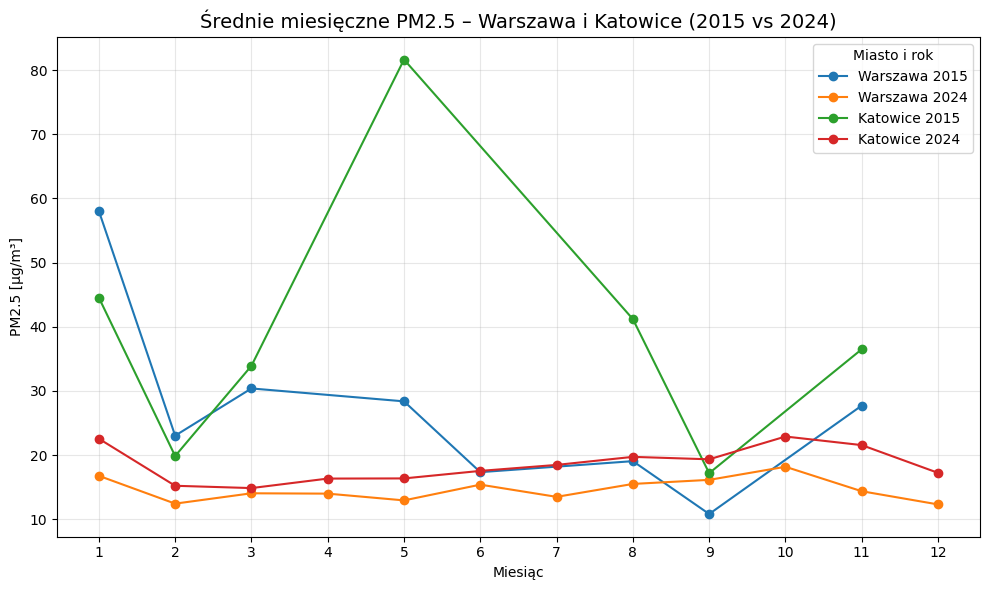

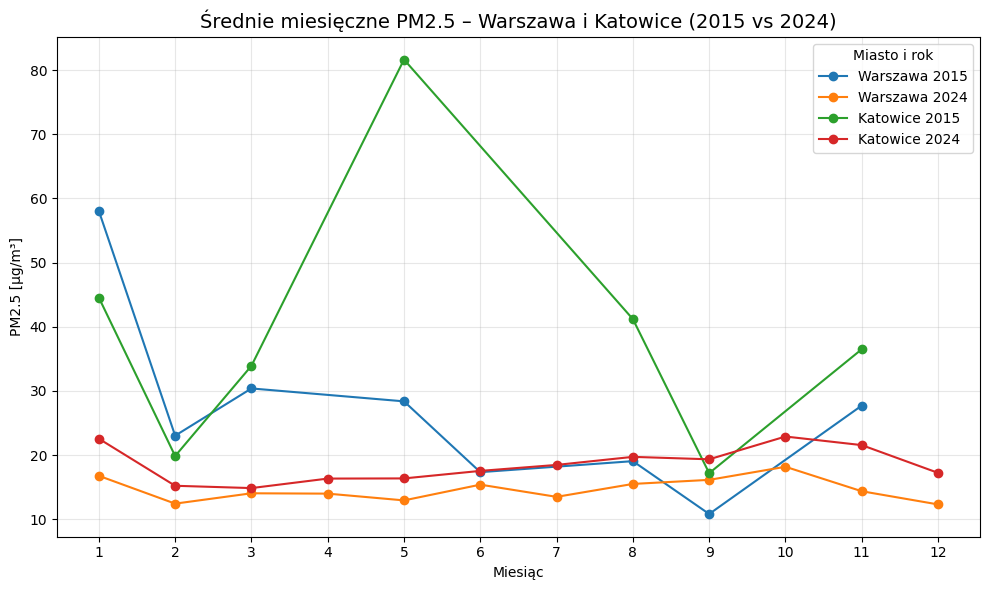

In [8]:
# wykres
from visualizations import plot_city_trends
fig = plot_city_trends(trend_df)
fig

### Obserwacje i interpretacja:
- Zarówno w 2014, jak i w 2024 roku **najniższe wartości występują latem (maj–sierpień), a najwyższe zimą**, co wiąże się z intensywniejszym ogrzewaniem budynków i większym zużyciem paliw stałych.
- W **Warszawie** zimowe wartości w 2014 roku są znacznie wyższe niż w 2024, co wskazuje na wyraźną poprawę jakości powietrza w ciągu analizowanej dekady.
- W **Katowicach** poziomy PM2.5 zimą są ogólnie wyższe niż w Warszawie, ale w 2024 roku też obserwujemy istotny spadek względem 2014.
- W miesiącach letnich stężenia PM2.5 są niskie i stosunkowo stabilne w obu latach, a różnice między 2014 i 2024 są dużo mniejsze niż zimą.

Porównanie lat 2014 i 2024 wskazuje na **wyraźną poprawę jakości powietrza**, szczególnie w sezonie grzewczym.  
W obu miastach średnie miesięczne stężenia PM2.5 zmalały, co sugeruje skuteczność działań ograniczających emisję zanieczyszczeń. 
Mimo poprawy, **Katowice nadal są bardziej zanieczyszczone niż Warszawa**.

## 3. Heatmapa miesięcznych średnich

In [9]:
from means import prepare_ex3_heatmap_df, heatmap_sanity_summary

df_ex3 = prepare_ex3_heatmap_df(monthly_PM25)
summary3 = heatmap_sanity_summary(df_ex3)

print("Lata w df_ex3:", summary3["years_present"])
print("Liczba miast:", summary3["n_cities"])
display(summary3["months_per_city_year"])
print("Zakres PM2.5:", summary3["pm25_min"], "-", summary3["pm25_max"])




Lata w df_ex3: [2015, 2018, 2021, 2024]
Liczba miast: 22


year,2015,2018,2021,2024
city,,,,
Białystok,8,12,12,12
Bydgoszcz,8,12,12,12
Jelenia Góra,8,12,12,12
Kalisz,7,12,12,12
Katowice,7,12,12,12
Kraków,8,12,12,12
Kędzierzyn-Koźle,8,12,12,12
Legionowo,8,12,12,12
Lublin,8,12,12,12


Zakres PM2.5: 3.7 - 206.839


In [8]:
from visualizations import plot_city_heatmaps
fig = plot_city_heatmaps(df_ex3, cities=cities_ex3, annot=False, ncols=3)
fig

from visualizations import plot_city_heatmaps

fig = plot_city_heatmaps(df_ex3, cities=cities_ex3, ncols=4, annot=False)
fig



ModuleNotFoundError: No module named 'seaborn'

### Obserwacje i interpretacja:
- We wszystkich analizowanych miastach najniższe stężenia PM2.5 występują latem, a najwyższe zimą, co wynika z sezonu grzewczego.
- W 2014 roku we wszystkich miastach wartości stężenia PM2.5 są najwyższe.
- W 2019 roku widać już wyraźne rozjaśnienie w zimowych miesiącach, co oznacza częściową poprawę jakości powietrza.
- W 2024 roku stężenia zimą są w większości miast dużo niższe niż w poprzednich latach.
- Letnie miesiące mają zbliżone, niskie poziomy PM2.5 we wszystkich latach, a różnice między latami 2014–2024 są tu znacznie mniejsze niż zimą.

Heatmapy z lat 2014, 2019 i 2024 pokazują poprawę jakości powietrza, szczególnie w sezonie zimowym.
Wszystkie miasta wykazują spadek zimowych wartości PM2.5, co wskazuje na skuteczność działań antysmogowych.
Mimo poprawy, we wszystkich miejscowościach zima pozostaje okresem najgorszej jakości powietrza.


## 4. Dni z przekroczeniem normy (WHO)

In [16]:
pio.renderers.default = "jupyterlab"
pio.renderers.default = "notebook_connected"

# Pick 6 stations based on 2024
df_2024 = df_ex4[df_ex4["year"] == 2024]
top3 = df_2024.nlargest(3, "exceeded")
bottom3 = df_2024.nsmallest(3, "exceeded")
stations_6 = pd.concat([top3, bottom3])["station"].unique()

# Filter full data for these stations
top_low_df = df_ex4[df_ex4["station"].isin(stations_6)].copy()

# Prepare plot
station_groups = top_low_df["station"].unique()
years = sorted(top_low_df["year"].unique())
years = top_low_df["year"].unique()

bars = []
colors = ['#7FB3D5',
          '#1F618D',
          '#F4D03F',
          '#C0392B',
          '#008080',
          '#40B0A6']

 
# Generate bars: one color group
for i, station in enumerate(station_groups):
    df = top_low_df[top_low_df["station"] == station]
    bar = go.Bar(
        x=df["year"],
        y=df["exceeded"],
        name=station, 
        marker=dict(color=colors[i])
    )
    bars.append(bar)

# Create figure
fig = go.Figure(data=bars)
fig.update_layout(
    font=dict(
        family="Liberation Serif",  
        size=20,                 
        color="#2C3E50"            
    ),
    barmode='group',
    title=dict(
        text="Dni z przekroczeniem normy (WHO)",
        x=0.5, 
        xanchor='center',
        font=dict(
            family="Liberation Serif",  
            size=35,
            color="#2C3E50"
        )
    ),
    xaxis_title="Rok",
    yaxis_title="Liczba przekroczonych dni",
)
fig.write_html("exceeded_days_plot.html")
fig.show()

## Analiza
Na podstawie wykresu można zauważyć ogólny trend spadkowy liczby dni z przekroczeniem dobowej normy PM2.5 między rokiem 2014 a 2024 dla większości analizowanych stacji. Wskazuje to na poprawę jakości powietrza w badanym okresie.

Warto jednak podkreślić, że nie wszystkie stacje wykazują jednolity spadek w każdym roku. Przykładowo, dla stacji **LdZgieMielcz** obserwujemy wzrost liczby przekroczeń między 2014 a 2019 rokiem, zanim nastąpił ponowny spadek w roku 2024. Oznacza to, że poprawa jakości powietrza nie następowała w tym przypadku w sposób liniowy.

Podsumowując — mimo pewnych wyjątków, najbardziej charakterystycznym wzorcem jest wyraźna redukcja liczby dni z przekroczeniami normy PM2.5 do roku 2024, co sugeruje skuteczniejsze działania antysmogowe i/lub korzystniejsze warunki atmosferyczne.
